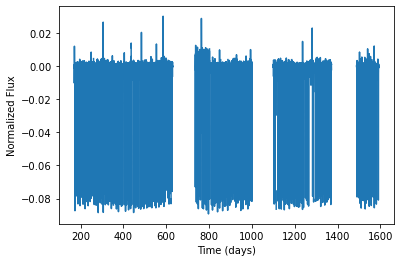

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
71422   -0.000277
71423   -0.000560
71424   -0.001091
71425    0.000061
71426   -0.001025
Name: LC_INIT, Length: 71427, dtype: float32


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

hdul = fits.open('kplr010287248-20160128150956_dvt.fits')
data = hdul[1].data
time = data['TIME']

# Plot the data
plt.plot(time, data['LC_INIT'])
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
plt.show()

import math
i=0
j=0
usableData = []

#transoform fits data into a pandas dataframe
df = pd.DataFrame(hdul[1].data)
print(df["LC_INIT"][:])

#save df into a csv file with TIME and LC_INIT
df.to_csv('test.csv')



In [64]:
#np array to pandas dataframe
df = pd.DataFrame(usableData)
df.head()



SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (4073835168.py, line 9)

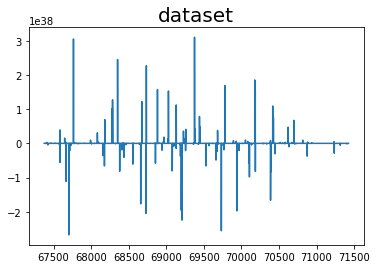

                TIME      TIMECORR   CADENCENO         PHASE       LC_INIT  \
67375   8.055698e+02  3.321689e-12 -2146762496 -1.111508e+35  1.828379e+21   
67376  9.671356e-150 -9.860836e+05 -2129985280 -7.820587e+00 -8.347332e+24   
67377 -1.312464e+158  4.588500e+21 -2113208064 -6.056646e-34  1.483222e-15   
67378 -1.407568e+159 -3.319735e+35 -2096430848  2.043740e+10  3.141124e+01   
67379 -3.594105e-152 -1.338530e-29 -2079653632  5.978303e-24  2.743173e-10   
...              ...           ...         ...           ...           ...   
71422  9.408305e-305 -2.830692e-12  1327169792 -2.045250e-14  1.401584e-11   
71423 -4.572427e+154  1.774202e+10  1343947008 -2.139555e+15  1.362525e-18   
71424   1.217041e+03 -1.189564e+29  1360724224  5.274119e-34  9.756431e-26   
71425 -1.011380e-306 -9.523594e-35  1377501440  8.727692e-07 -4.582609e-22   
71426  -3.006504e+03  9.399716e-27  1394278656  3.903077e+23 -1.013647e-32   

        LC_INIT_ERR      LC_WHITE    LC_DETREND  MODEL_INIT   M

In [32]:
sys_byteorder = ('>', '<')[sys.byteorder == 'little']
hdul[1].data = hdul[1].data.byteswap().newbyteorder(sys_byteorder)

df = pd.DataFrame(hdul[1].data)
df = df.dropna()
df = df[66000:len(df)]

#plot the data
plt.title('dataset', size=20)
plt.plot(df["LC_INIT"])
plt.show()

#create csv file with TIME and LC INIT

#convet Barycentric Julian Date to Julian Date
#df["TIME"] = df["TIME"] + 2454833

#convert Julian Date to Gregorian Date
#df["Gregorian Date"] = pd.to_datetime(df["TIME"], unit='D', origin='julian')
print(df)
df.to_csv('data.csv', columns=['TIME', 'LC_INIT'])